In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Step 1: Generate Synthetic Data
def generate_data(num_samples=10000):
    grades = []
    ph_values = []
    temperatures = []
    colours = []
    densities = []
    
    for _ in range(num_samples):
        grade_choice = np.random.choice(["High", "Medium", "Low"], p=[0.33, 0.33, 0.34])
        
        if grade_choice == "High":
            ph = round(np.random.uniform(6.4, 6.8), 1)
            temp = np.random.randint(35, 46)
            density = round(np.random.uniform(1.030, 1.035), 2)
            colour = np.random.randint(245, 256)
        elif grade_choice == "Medium":
            ph = round(np.random.uniform(6.4, 6.8), 1)
            temp = np.random.randint(34, 51)
            density = round(np.random.uniform(1.027, 1.029), 2)
            colour = np.random.randint(240, 256)
        else:  # Low Grade
            ph = round(np.random.choice([np.random.uniform(5.0, 6.0), np.random.uniform(8.1, 9.0)]), 1)
            temp = np.random.randint(50, 61)
            density = round(np.random.uniform(1.020, 1.026), 2)
            colour = np.random.randint(240, 256)

        grades.append(grade_choice)
        ph_values.append(ph)
        temperatures.append(temp)
        densities.append(density)
        colours.append(colour)
    
    df = pd.DataFrame({
        "pH": ph_values,
        "Temperature": temperatures,
        "Density": densities,
        "Colour": colours,
        "Grade": grades
    })
    return df

In [22]:
# Step 2: Create dataset
df = generate_data()
print(df.head())

    pH  Temperature  Density  Colour   Grade
0  6.5           35     1.03     242  Medium
1  6.4           42     1.03     251    High
2  5.8           52     1.02     254     Low
3  8.6           53     1.02     246     Low
4  8.4           58     1.03     246     Low


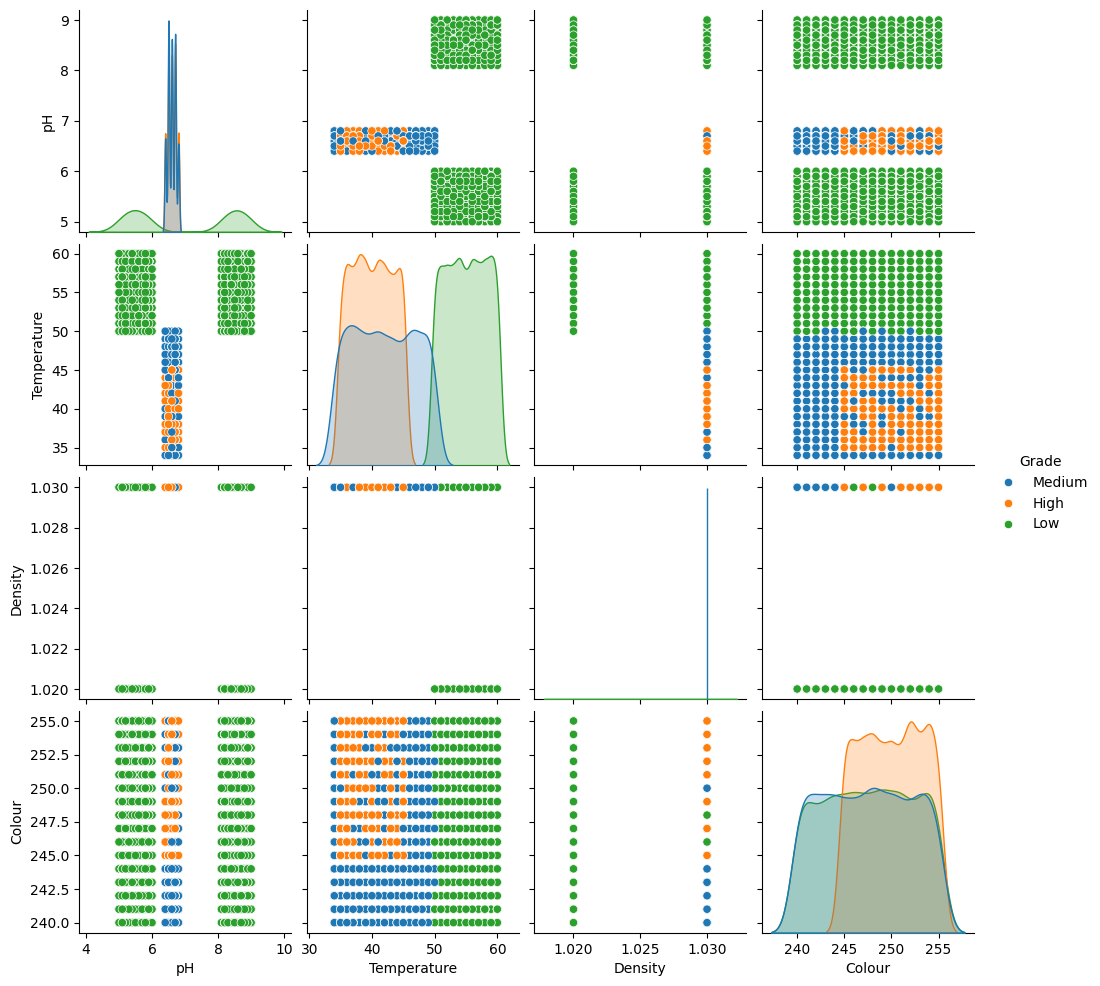

In [23]:
# Step 3: Visualize Distributions
sns.pairplot(df, hue="Grade")
plt.show()

In [24]:
# Step 4: Encode Grade Labels
df["Grade"] = df["Grade"].map({"Low": 0, "Medium": 1, "High": 2})

In [25]:
# Step 5: Train-Test Split
X = df.drop(columns=["Grade"])
y = df["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 6: Train a Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)

In [28]:
# Step 8: Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8165

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       0.80      0.63      0.70       692
           2       0.68      0.83      0.75       663

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.82      0.82      0.81      2000


Confusion Matrix:
 [[645   0   0]
 [  0 437 255]
 [  0 112 551]]


/var/folders/5n/qyzfh0jn3cn1gr88q2phnjhc0000gn/T/ipykernel_25858/1206280881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Grade", palette="viridis")


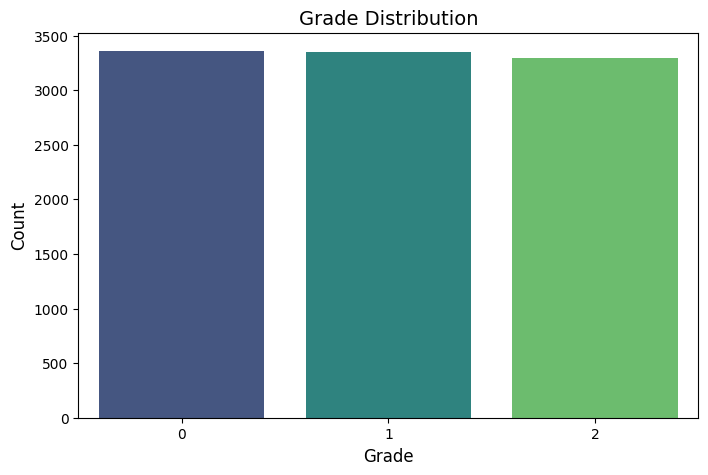

In [32]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a count plot for the Grade column
sns.countplot(data=df, x="Grade", palette="viridis")

# Set title and labels
plt.title("Grade Distribution", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

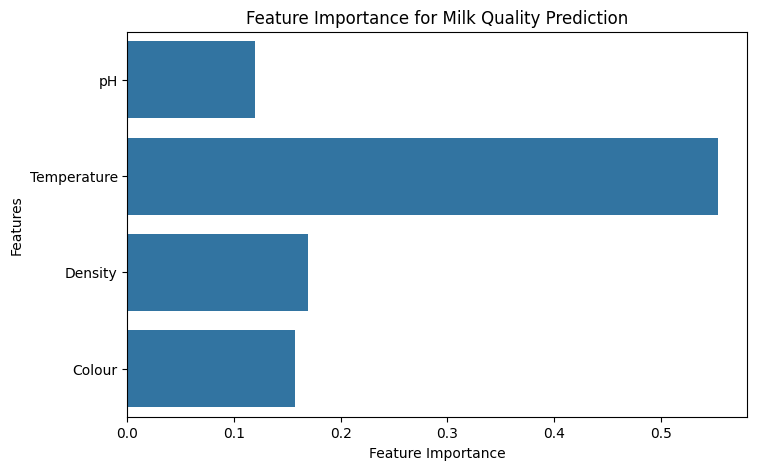

In [29]:
# Step 9: Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Milk Quality Prediction")
plt.show()

In [ ]:
# Step 10: Save Data
df.to_csv("datasets/milk_quality_data.csv", index=False)